In [7]:
import pandas as pd
from geodatasets import get_path
import geopandas as gpd
import geoplot as gplt
from sodapy import Socrata
import matplotlib.pyplot as plt
import numpy as np

In [8]:
client = Socrata("data.cityofnewyork.us", None)
results = client.get("wz6d-d3jb", limit=2000) 
results_df = pd.DataFrame.from_records(results)
nyc = gpd.read_file(get_path("geoda nyc"))

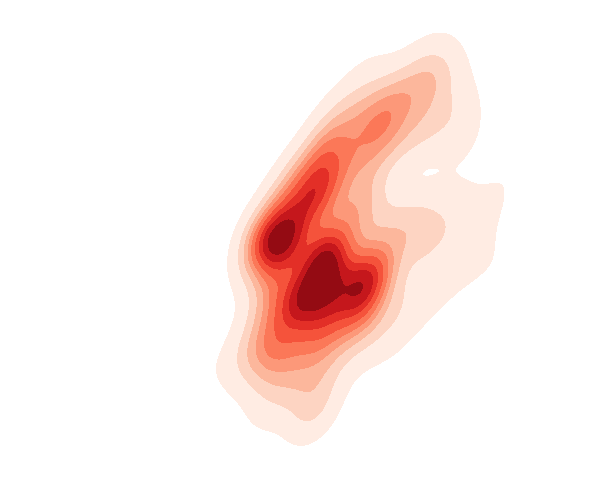

In [9]:
nyc_map = gpd.GeoDataFrame(
    results_df, geometry=gpd.points_from_xy(results_df["longitude"], results_df["latitude"], crs=4326)
)

ax = gplt.kdeplot(
    nyc_map, 
    cmap='Reds', 
    fill=True, 
    projection=gplt.crs.PlateCarree()
)

In [12]:
gplt.polyplot(nyc, ax=ax)

plt.show()

/opt/anaconda3/lib/python3.13/site-packages/cartopy/mpl/geoaxes.py:857: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  self.set_ylim([y1, y2])
